In [63]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [64]:
train = pd.read_csv('./data/training.csv')

In [65]:
train.head()

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,bin_value_sum,TDIST,actual,ACTUAL_BIN,MAX,NUM_OF_MAX,ACTUAL_CONF,HIT,pred_average,pred_var
0,1968,4,1968,NominalGNP,32,NaN,1968-32-1968-4,NominalGNP-1968-32-1968-4,0.0,0.0,...,100.0,0.0,9.40449,2.0,0.50,1.0,0.00,0.0,6.65,0.6275
1,1968,4,1968,NominalGNP,77,NaN,1968-77-1968-4,NominalGNP-1968-77-1968-4,15.0,6.0,...,100.0,0.0,9.40449,2.0,0.15,1.0,0.06,0.0,5.41,13.2419
2,1968,4,1968,NominalGNP,37,NaN,1968-37-1968-4,NominalGNP-1968-37-1968-4,0.0,1.0,...,100.0,0.0,9.40449,2.0,0.25,1.0,0.01,0.0,2.89,4.3579
3,1968,4,1968,NominalGNP,53,NaN,1968-53-1968-4,NominalGNP-1968-53-1968-4,5.0,10.0,...,100.0,0.0,9.40449,2.0,0.40,1.0,0.10,0.0,7.50,2.0000
4,1968,4,1968,NominalGNP,66,NaN,1968-66-1968-4,NominalGNP-1968-66-1968-4,0.0,0.0,...,100.0,0.0,9.40449,2.0,0.95,1.0,0.00,0.0,7.51,0.0499


In [66]:
train.columns

Index(['YEAR FORECAST MADE', 'QUARTER', 'YEAR BEING FORECAST', 'INDICATOR',
       'FORECASTER ID', 'INDUSTRY', 'Year.ID.ForecastYear.Quarter',
       'Indicator.Year.ID.ForecastYear.Quarter', 'BIN 1', 'BIN 2', 'BIN 3',
       'BIN 4', 'BIN 5', 'BIN 6', 'BIN 7', 'BIN 8', 'BIN 9', 'BIN 10',
       'BIN 11', 'BIN 12', 'BIN 13', 'BIN 14', 'BIN 15', 'BIN 1 prob',
       'BIN 2 prob', 'BIN 3 prob', 'BIN 4 prob', 'BIN 5 prob', 'BIN 6 prob',
       'BIN 7 prob', 'BIN 8 prob', 'BIN 9 prob', 'BIN 10 prob', 'BIN 11 prob',
       'BIN 12 prob', 'BIN 13 prob', 'BIN 14 prob', 'BIN 15 prob',
       'BIN 1 midpoint', 'BIN 2 midpoint', 'BIN 3 midpoint', 'BIN 4 midpoint',
       'BIN 5 midpoint', 'BIN 6 midpoint', 'BIN 7 midpoint', 'BIN 8 midpoint',
       'BIN 9 midpoint', 'BIN 10 midpoint', 'BIN 11 midpoint',
       'BIN 12 midpoint', 'BIN 13 midpoint', 'BIN 14 midpoint',
       'BIN 15 midpoint', 'nbin', 'bin_value_sum', 'TDIST', 'actual',
       'ACTUAL_BIN', 'MAX', 'NUM_OF_MAX', 'ACTUAL_CONF', 'HI

In [67]:
train['INDICATOR'].value_counts()

RealGDP         6066
Unemployment    3380
Core PCE        2130
Core CPI        2130
NominalGNP      1343
RealGNP         1168
Name: INDICATOR, dtype: int64

In [68]:
unemp = train[train['INDICATOR'] == "Unemployment"]
rgdp = train[train['INDICATOR'] == "RealGDP"]
cpce = train[train['INDICATOR'] == "Core PCE"]
ccpi = train[train['INDICATOR'] == "Core CPI"]
ngnp = train[train['INDICATOR'] == "NominalGNP"]
rgnp = train[train['INDICATOR'] == "RealGNP"]

In [69]:
np.random.seed(0)
def model_setup(df):
    
    rand = df.sample(frac = 1)
    #80/20 split
    nrow = len(rand)
    train_prop = int(np.round(nrow*0.8))
    train = rand[:train_prop]
    val = rand[train_prop:]

    #filling na with 0 bc they replaced 0s with na in the original R code but we should definitely look into this more
    train = train.fillna(0)
    val = val.fillna(0)

    X_train, Y_train = train[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], train[["actual"]]
    X_val, Y_val = val[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], val[["actual"]]
    
    return X_train, Y_train, X_val, Y_val

In [70]:
def run_model(df, variable_name):
    np.random.seed(0)
    X_train, Y_train, X_val, Y_val = model_setup(df)

    regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, Y_train)

    pred = regr.predict(X_val)
    pred = pred.flatten()
    
    print('MSE: ' + str(mean_squared_error(pred, np.array(Y_val['actual']))))
    diffs = np.subtract(np.array(Y_val['actual'].tolist()), pred)
    print("Differences in actual vs. model prediction (" + variable_name + ")")
    print("Mean: " + str(np.mean(diffs)))
    print("Median: " + str(np.median(diffs)))
    print("Max: " + str(max(diffs)))
    print("Min: " + str(min(diffs)))
    
    plt.hist(diffs)
    plt.title("Actual minus Model Prediction (" + variable_name + ")")
    plt.show()
    
    print('MSE: ' + str(mean_squared_error(np.array(Y_val['actual'].tolist()), np.array(X_val['pred_average'].tolist()))))
    actual_diffs = np.subtract(np.array(Y_val['actual'].tolist()), np.array(X_val['pred_average'].tolist()))
    print("Differences in actual vs. forecaster average prediction (" + variable_name + ")")
    print("Mean: " + str(np.mean(actual_diffs)))
    print("Median: " + str(np.median(actual_diffs)))
    print("Max: " + str(max(actual_diffs)))
    print("Min: " + str(min(actual_diffs)))
    
    plt.hist(actual_diffs)
    plt.title("Actual Rate minus Forecaster Average Prediction (" + variable_name + ")")
    plt.show()

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 1.874932426165445
Differences in actual vs. model prediction (Unemployment)
Mean: 0.1456402499705166
Median: -0.0015462687113474288
Max: 7.036115780152269
Min: -2.9448603861654643


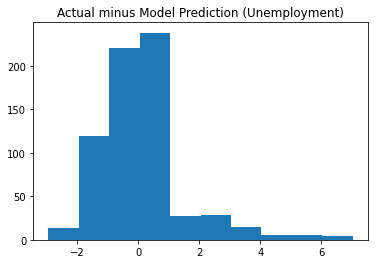

MSE: 9.48429059942239
Differences in actual vs. forecaster average prediction (Unemployment)
Mean: 0.14222593528106428
Median: -0.31666666666667
Max: 9.60833333333333
Min: -6.0753


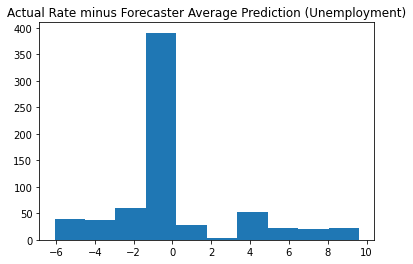

In [71]:
run_model(unemp, "Unemployment")

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 1.7044144781319701
Differences in actual vs. model prediction (Real GDP)
Mean: -0.3142199536074982
Median: -0.339349932772937
Max: 3.027227242249224
Min: -4.529678224906677


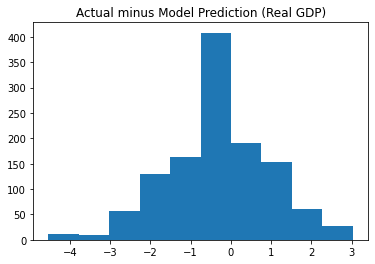

MSE: 2.3505053905747024
Differences in actual vs. forecaster average prediction (Real GDP)
Mean: 0.08728694012348996
Median: 0.0
Max: 4.75324
Min: -5.286759999999999


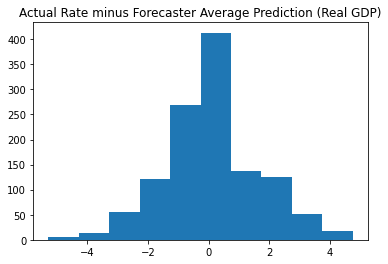

In [72]:
run_model(rgdp, "Real GDP")

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.15977892670039903
Differences in actual vs. model prediction (Core CPE)
Mean: 0.01047366641463594
Median: 0.07390462618900906
Max: 1.101475289806302
Min: -1.151909966625016


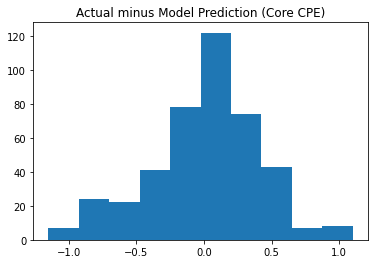

MSE: 0.9061324475832923
Differences in actual vs. forecaster average prediction (Core CPE)
Mean: 0.08694700919089784
Median: -0.057917850311764996
Max: 2.2531737289531297
Min: -2.3


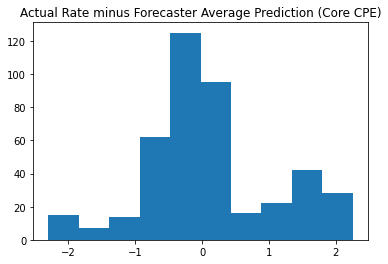

In [73]:
run_model(cpce, "Core CPE")

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.29301007074997143
Differences in actual vs. model prediction (Core CPI)
Mean: 0.041597477258717604
Median: 0.15006322265046668
Max: 0.96309054718805
Min: -1.6400165084915606


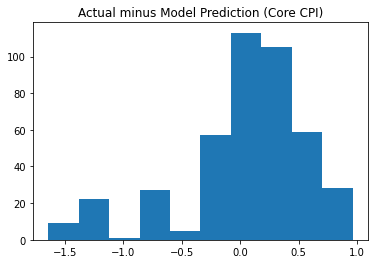

MSE: 0.9428025077246286
Differences in actual vs. forecaster average prediction (Core CPI)
Mean: 0.07603754849554556
Median: -0.023838544155614927
Max: 2.31034482758621
Min: -2.7868


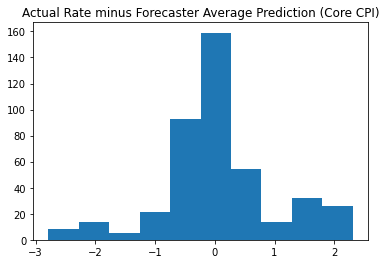

In [74]:
run_model(ccpi, "Core CPI")

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 1.9676002242567519
Differences in actual vs. model prediction (Nominal GNP)
Mean: 0.2894204005322143
Median: 0.15696616775685168
Max: 4.42621422910029
Min: -4.182644821060959


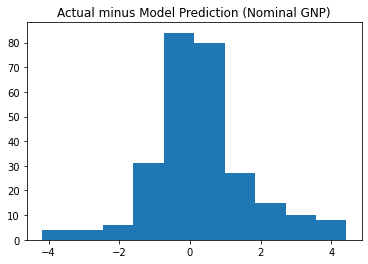

MSE: 13.5740157305374
Differences in actual vs. forecaster average prediction (Nominal GNP)
Mean: 2.145945628105561
Median: 1.1278699999999997
Max: 12.05461
Min: -3.7128499999999995


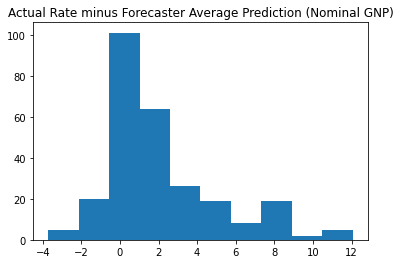

In [75]:
run_model(ngnp, "Nominal GNP")

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.2510496819288398
Differences in actual vs. model prediction (Real GNP)
Mean: -0.06817744136459407
Median: -0.08084379676745845
Max: 1.3901119492060543
Min: -1.4393519341791419


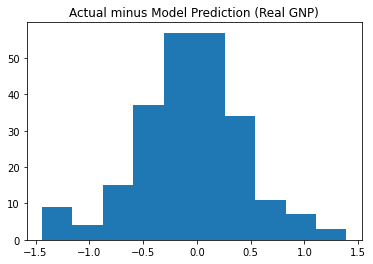

MSE: 3.7725019927767383
Differences in actual vs. forecaster average prediction (Real GNP)
Mean: 0.9254330499136909
Median: 0.8776549999999999
Max: 7.10641
Min: -5.73796


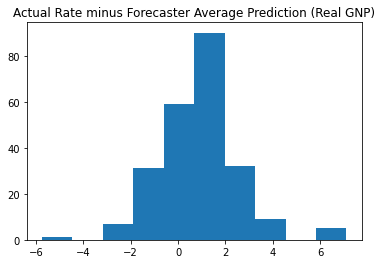

In [76]:
run_model(rgnp, "Real GNP")